# Importing Libraries

First we import the libraries necessary to analyze the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import utils as m

Then we load the csv data into pandas dataframe

In [2]:
incidents = pd.read_csv("../data/incidents.csv", low_memory=False)
poverty = pd.read_csv("../data/povertyByStateYear.csv", low_memory=False)
districts = pd.read_csv("../data/year_state_district_house.csv", low_memory=False)
population = pd.read_csv("../data/Population by Age and Sex - US, States, Counties.csv", low_memory=False)

In [3]:
incidents.info()
poverty.info()
districts.info()

num_duplicates = incidents.duplicated(
    subset=['longitude', 'latitude', 'date', 'state', 'city_or_county', 'n_participants']).sum()
print(f"Number of duplicates in the DataFrame: {num_duplicates}")

num_duplicates = poverty.duplicated().sum()
print(f"Number of duplicates in the DataFrame: {num_duplicates}")

num_duplicates = districts.duplicated().sum()
print(f"Number of duplicates in the DataFrame: {num_duplicates}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       239677 non-null  object 
 1   state                      239677 non-null  object 
 2   city_or_county             239677 non-null  object 
 3   address                    223180 non-null  object 
 4   latitude                   231754 non-null  float64
 5   longitude                  231754 non-null  float64
 6   congressional_district     227733 non-null  float64
 7   state_house_district       200905 non-null  float64
 8   state_senate_district      207342 non-null  float64
 9   participant_age1           147379 non-null  float64
 10  participant_age_group1     197558 non-null  object 
 11  participant_gender1        203315 non-null  object 
 12  min_age_participants       164879 non-null  object 
 13  avg_age_participants       16

Visualize how many null values are in the first dataset

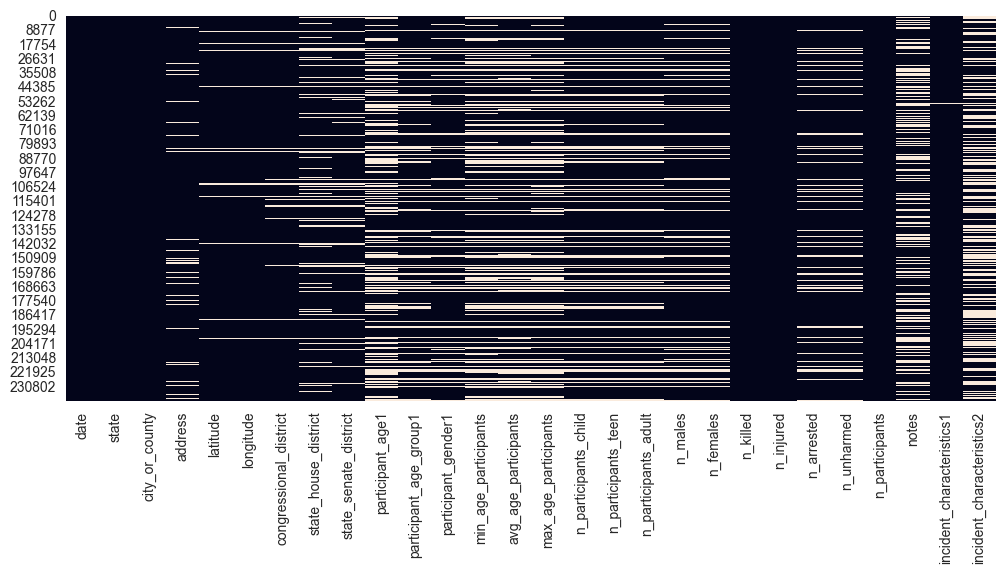

In [4]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(incidents.isnull(), cbar=False, xticklabels=True, ax=ax)
plt.show()

# Incidents Data

Let's take a look at the incidents data

# Features information

"Type" indicates the wanted feature Datatype for conversion, most of the columns are defaulted to object type and need casting.

- **date**
    - **Type:** Datetime
    - **Description:** Date of the incident.

- **state**
    - **Type:** String
    - **Description:** State where the incident occurred.
        
- **city_or_county**
    - **Type:** String
    - **Description:** City or county where the incident occurred.

- **address**
    - **Type:** String
    - **Description:** Address related to the incident (if available).

- **latitude / longitude**
    - **Type:** Float64
    - **Description:** Geographical coordinates of the incident location.

- **congressional_district / state_house_district / state_senate_district**
    - **Type:** Float64
    - **Description:** Political district information related to the incident location.
 
- **participant_age1 / participant_age_group1 / participant_gender1**
    - **Type:** Float64 and String
    - **Description:** Information about the age, age groups, and gender of a random participant of the incident.

- **min_age_participants / avg_age_participants / max_age_participants**
    - **Type:** Int64
    - **Description:** Minimum, average, and maximum ages of the participants.

- **n_participants_child / n_participants_teen / n_participants_adult**
    - **Type:** Int64
    - **Description:** Count of participants categorized into child, teen, and adult groups.

- **n_males / n_females**
    - **Type:** Float64
    - **Description:** Counts of males / females involved in the incident.

- **n_killed**
    - **Type:** Int64
    - **Description:** Counts of individuals killed in the incident.

- **n_injured**
    - **Type:** Int64
    - **Description:** Counts of individuals injured in the incident.

- **n_unharmed**
    - **Type:** Float64
    - **Description:** Counts of participants not harmed in the incident.
 
- **n_arrested**
    - **Type:** Float64
    - **Description:** Counts of individuals arrested in the incident.

- **n_participants**
    - **Type:** Float64
    - **Description:** Total count of participants involved in the incident.

- **notes**
    - **Type:** String
    - **Description:** Additional notes or details related to the incident.

- **incident_characteristics1 / incident_characteristics2**
    - **Type:** String
    - **Description:** Characteristics or features of the incident.



# Data Casting

Most of the columns are defaulted to object type and need casting to Int64, handling strings and null values present.


In [5]:
#Converts date to datetime
incidents['date'] = pd.to_datetime(incidents['date'], errors='coerce')

#Converts age columns to numeric, since Strings are present, then to int
age_columns = ['participant_age1', 'min_age_participants', 'avg_age_participants', 'max_age_participants']
incidents[age_columns] = incidents[age_columns].apply(pd.to_numeric, errors='coerce')

age_groups = ['n_participants_child', 'n_participants_teen', 'n_participants_adult']
incidents[age_groups] = incidents[age_groups].apply(pd.to_numeric, errors='coerce')
incidents[age_groups] = incidents[age_groups].astype('Int64')

#Converts to Int64
participant_columns = ['n_participants', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed']
incidents[participant_columns] = incidents[participant_columns].astype('Int64')
for column in participant_columns:
    incidents[column] = incidents[column].apply(m.to_int)

# Standardize to lowercase the characteristics columns
incident_characteristics_columns = ['incident_characteristics1', 'incident_characteristics2']
incidents[incident_characteristics_columns] = incidents[incident_characteristics_columns].astype('string')
for column in incident_characteristics_columns:
    incidents[column] = incidents[column].str.lower()

# removing special characters from notes

incidents['notes'] = incidents['notes'].str.lower().replace(r'[^\w\s]', '')

# write year and month to the dataframe from date
incidents['year'] = incidents['date'].dt.year
incidents['month'] = incidents['date'].dt.month
incidents['day'] = incidents['date'].dt.day


In [6]:
incidents.describe()


,date,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,min_age_participants,avg_age_participants,max_age_participants,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,year,month,day
count,239677,231754.000000,231754.000000,227733.000000,200905.000000,207342.00000,147379.000000,1.591260e+05,1.591680e+05,1.590840e+05,...,203315.000000,203315.000000,239677.000000,239677.000000,212051.000000,212051.000000,239677.000000,239677.000000,239677.000000,239677.000000
mean,2017-08-21 02:54:15.871860480,37.546598,-89.338348,8.001265,55.447132,20.47711,30.295707,5.674359e+06,2.446181e+04,1.871406e+04,...,1.520252,0.212340,0.252290,0.494007,0.468439,0.494169,1.636895,2017.151879,6.352504,15.779628
min,2013-01-01 00:00:00,19.111400,-171.429000,0.000000,1.000000,1.00000,0.000000,-1.000000e+03,-1.000000e+03,-1.000000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.000000,1.000000
25%,2015-07-11 00:00:00,33.903400,-94.158725,2.000000,21.000000,9.00000,21.000000,1.900000e+01,2.100000e+01,2.100000e+01,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2015.000000,3.000000,8.000000
50%,2016-08-25 00:00:00,38.570600,-86.249600,5.000000,47.000000,19.00000,27.000000,2.500000e+01,2.700000e+01,2.800000e+01,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,6.000000,16.000000
75%,2017-08-09 00:00:00,41.437375,-80.048625,10.000000,84.000000,30.00000,37.000000,3.500000e+01,3.700000e+01,4.000000e+01,...,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2017.000000,9.000000,23.000000
max,2030-11-28 00:00:00,71.336800,97.433100,53.000000,901.000000,94.00000,311.000000,9.000000e+11,8.719163e+08,8.300000e+06,...,61.000000,23.000000,50.000000,53.000000,63.000000,20.000000,103.000000,2030.000000,12.000000,31.000000
std,NaN,5.130763,14.359546,8.480835,42.048117,14.20456,13.363592,2.256171e+09,2.199489e+06,1.071527e+05,...,0.996767,0.490888,0.521779,0.729952,0.851035,0.925566,1.252514,4.145756,3.448189,8.826932


# Handling wrong values

As we can see from describe, there are some clearly wrong values that would act as outliers and harm the distribution plots.
For the moment, we limit to setting them to pd.NA so pandas can ignore them while computing distributions.

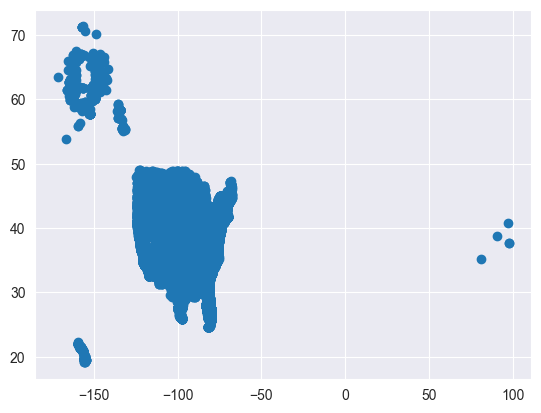

In [7]:
# plot latitude and longitude to check for wrong values
plt.scatter(incidents['longitude'], incidents['latitude'])
plt.show()

In [8]:
# We can see that there are some wrong values for latitude and longitude, let's check them first
# values are over 50 longitude
incidents[incidents['longitude'] > 50].head()

,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2,year,month,day
30351,2018-03-29,Kansas,Wichita,NaN,37.6499,97.4331,NaN,NaN,NaN,NaN,...,0,NaN,NaN,0,NaN,non-shooting incident,tsa action,2018,3,29
102739,2018-03-25,Kansas,Wichita,NaN,37.6499,97.4331,NaN,NaN,NaN,NaN,...,0,NaN,NaN,0,NaN,non-shooting incident,tsa action,2018,3,25
156596,2018-03-20,Nebraska,Lincoln,NaN,40.8509,96.7591,NaN,NaN,NaN,NaN,...,0,NaN,NaN,0,NaN,non-shooting incident,tsa action,2018,3,20
174651,2017-12-22,North Carolina,Charlotte,NaN,35.2137,80.9491,NaN,NaN,NaN,NaN,...,0,NaN,NaN,0,NaN,non-shooting incident,tsa action,2017,12,22
196998,2017-11-15,Missouri,St Louis,NaN,38.7487,90.3700,NaN,NaN,NaN,NaN,...,0,NaN,NaN,0,NaN,non-shooting incident,tsa action,2017,11,15


By checking the state, we can see that the longitude is missing the minus sign, so we add it.

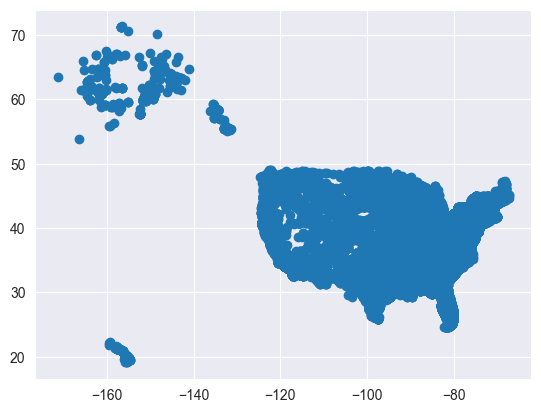

In [9]:
incidents.loc[incidents['longitude'] > 50, 'longitude'] = incidents['longitude'] * -1
# plot latitude and longitude to check for wrong values
plt.scatter(incidents['longitude'], incidents['latitude'])
plt.show()

In [10]:
# Ages must be non-negative and not unrealistic
for column in age_columns:
    incidents[column] = incidents[column].apply(m.clean_age)

# The number of people in an age group can't be negative, nor higher than the total    
for column in age_groups:
    incidents[column] = incidents[column].apply(m.non_negative_int)

sum_age_groups = incidents[age_groups].sum(axis=1)
mask = sum_age_groups > incidents['n_participants']

# Replace exceeding values in 'age_groups' columns with pd.NA
incidents.loc[mask, age_groups] = pd.NA

incidents.info()
incidents.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       239677 non-null  datetime64[ns]
 1   state                      239677 non-null  object        
 2   city_or_county             239677 non-null  object        
 3   address                    223180 non-null  object        
 4   latitude                   231754 non-null  float64       
 5   longitude                  231754 non-null  float64       
 6   congressional_district     227733 non-null  float64       
 7   state_house_district       200905 non-null  float64       
 8   state_senate_district      207342 non-null  float64       
 9   participant_age1           147377 non-null  float64       
 10  participant_age_group1     197558 non-null  object        
 11  participant_gender1        203315 non-null  object  

,date,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,min_age_participants,avg_age_participants,max_age_participants,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,year,month,day
count,239677,231754.000000,231754.000000,227733.000000,200905.000000,207342.00000,147377.000000,147381.000000,147377.000000,147378.000000,...,203315.000000,203315.000000,239677.000000,239677.000000,212051.000000,212051.000000,239677.000000,239677.000000,239677.000000,239677.000000
mean,2017-08-21 02:54:15.871860480,37.546598,-89.342343,8.001265,55.447132,20.47711,30.292590,28.333360,29.996153,31.800852,...,1.520252,0.212340,0.252290,0.494007,0.468439,0.494169,1.636895,2017.151879,6.352504,15.779628
min,2013-01-01 00:00:00,19.111400,-171.429000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.000000,1.000000
25%,2015-07-11 00:00:00,33.903400,-94.159175,2.000000,21.000000,9.00000,21.000000,20.000000,21.000000,22.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2015.000000,3.000000,8.000000
50%,2016-08-25 00:00:00,38.570600,-86.249650,5.000000,47.000000,19.00000,27.000000,25.000000,27.000000,28.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,6.000000,16.000000
75%,2017-08-09 00:00:00,41.437375,-80.048975,10.000000,84.000000,30.00000,37.000000,34.000000,36.000000,38.000000,...,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2017.000000,9.000000,23.000000
max,2030-11-28 00:00:00,71.336800,-67.271100,53.000000,901.000000,94.00000,101.000000,101.000000,101.000000,101.000000,...,61.000000,23.000000,50.000000,53.000000,63.000000,20.000000,103.000000,2030.000000,12.000000,31.000000
std,NaN,5.130763,14.334668,8.480835,42.048117,14.20456,13.335541,12.477595,12.438917,13.693545,...,0.996767,0.490888,0.521779,0.729952,0.851035,0.925566,1.252514,4.145756,3.448189,8.826932


# Missing values

Due to the presence of null values in the dataset, we need to handle them in order to avoid problems during the analysis.
For n_arrested and n_unharmed we can assume that the null values are 0.

For the columns ['n_participants_child', 'n_participants_teen', 'n_participants_adult', 'n_killed', 'n_injured', 'n_males', 'n_females', 'n_arrested', 'n_unharmed'] we can assume that the null values are 0 if "n_participants" is 0.

In [11]:
# When n_participants is 0, we decided to drop the row
incidents = incidents[incidents['n_participants'] > 0]

In [12]:
# We can check why those column have null values by isolating the rows with null values

null_injured_arrested_rows = incidents[incidents['n_injured'].isnull() | incidents['n_arrested'].isnull()]
null_injured_arrested_rows.head()

null_gender_rows = incidents[incidents['n_males'].isnull() | incidents['n_females'].isnull()]
null_gender_rows.head()

,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2,year,month,day
2,2016-11-05,Michigan,Detroit,6200 Block of East McNichols Road,42.4190,-83.0393,14.0,4.0,2.0,NaN,...,1,0.0,1.0,2,1 inj.,shot - wounded/injured,<NA>,2016,11,5
44,2014-10-25,Michigan,Clarkston,6480 Sashabaw Rd,42.7313,-83.3795,8.0,43.0,12.0,NaN,...,0,NaN,NaN,1,bp - robbed at gunpoint by 1 man.;\r\r\r\r\n42...,institution/group/business,armed robbery with injury/death and/or evidenc...,2014,10,25
52,2017-09-30,Ohio,Oregon,200 block of Bonnie Doone Dr,41.6901,-83.3961,NaN,NaN,NaN,77.0,...,0,NaN,NaN,1,"approx. 5:30 pm, suspect fired shots in garage...",institution/group/business,shots fired - no injuries,2017,9,30
113,2015-12-15,Georgia,Savannah,400 East Broad Street,32.0714,-81.0868,1.0,163.0,2.0,NaN,...,0,0.0,1.0,1,"brief lockdown, elem age student with unloaded...",institution/group/business,non-shooting incident,2015,12,15
131,2014-06-16,Missouri,Cape Girardeau,1000 block of Bloomfield Street,37.2993,-89.5323,8.0,147.0,27.0,14.0,...,1,0.0,0.0,1,teenager was shot while walking in an alley.,shot - wounded/injured,<NA>,2014,6,16


TODO: decide what to do with these null values

In [13]:
# We replace the missing number of unharmed by subtracting the number of killed and injured from the number of participants, if they are present
incidents['n_unharmed'] = incidents['n_unharmed'].fillna(incidents['n_participants'] - incidents['n_killed'] - incidents['n_injured']).astype('Int64')

<Axes: >

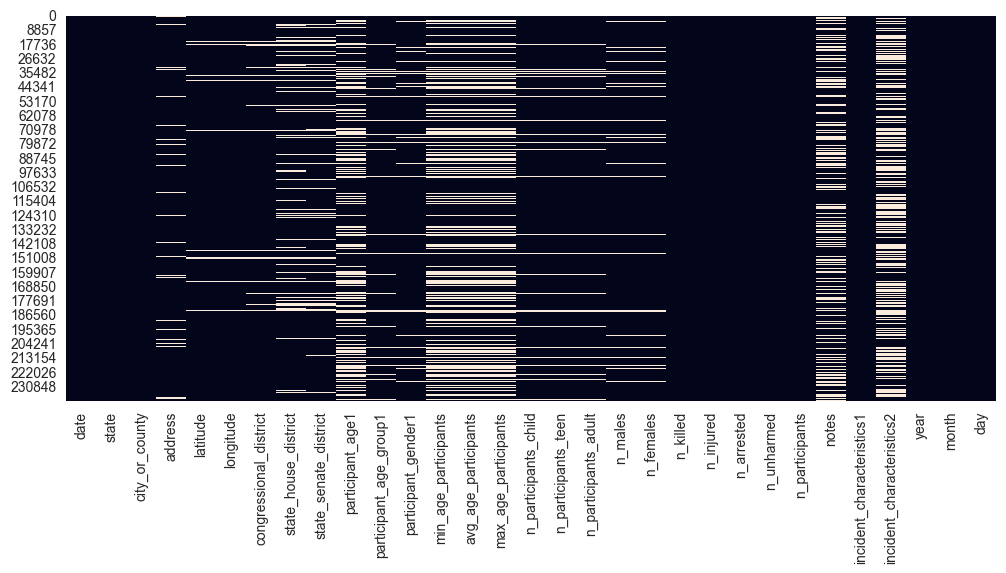

In [14]:
# For remaining n_arrested and n_unharmed we can assume that the null values are 0
incidents['n_arrested'] = incidents['n_arrested'].fillna(0).astype('Int64')
incidents['n_unharmed'] = incidents['n_unharmed'].fillna(0).astype('Int64')

incidents.describe()

# plot the heatmap to check if there are still null values
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(incidents.isnull(), cbar=False, xticklabels=True, ax=ax)

# Attributes exploration and outliers fixing
We now explore the distributions in order to find the outliers of each attribute.

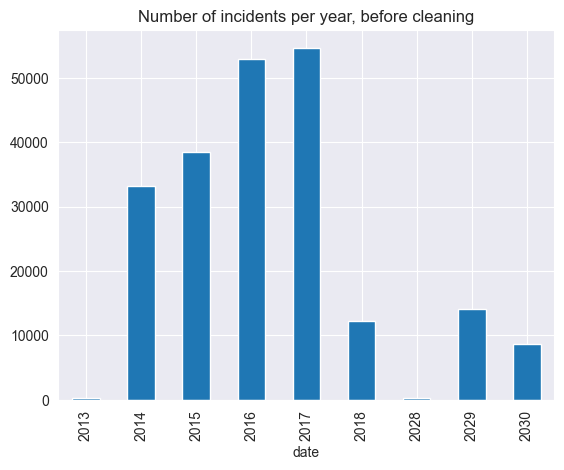

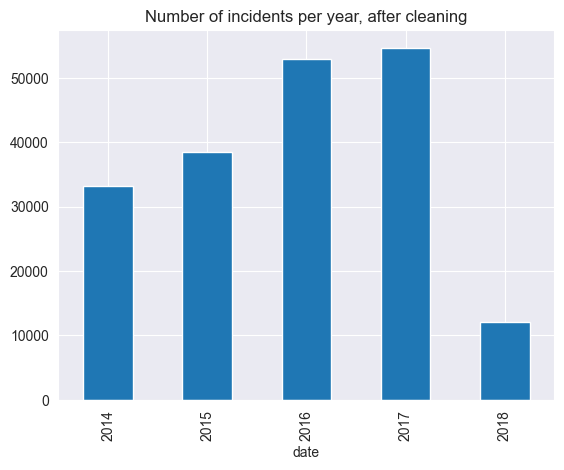

In [15]:

# Checking the years
incidents.date.groupby(incidents.date.dt.year).count().plot(kind='bar')
plt.title('Number of incidents per year, before cleaning')
plt.show()

# We should exclude 2028 to 2030 as they are in the future, 2013 have too little data
incidents = incidents[(incidents.year <= 2018) & (incidents.year > 2013)]

incidents.date.groupby(incidents.date.dt.year).count().plot(kind='bar')
plt.title('Number of incidents per year, after cleaning')
plt.show()


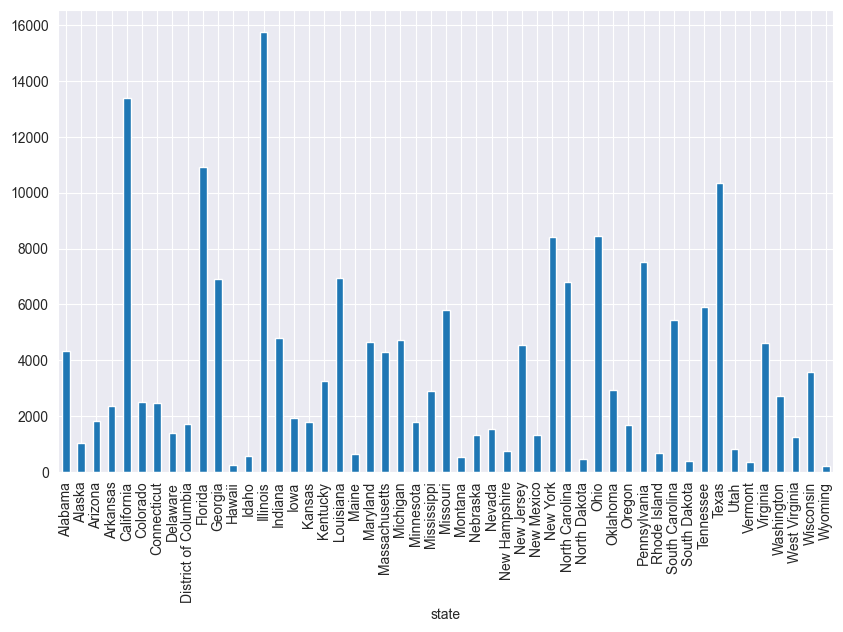

In [16]:
# Checking the state distribution
plt.figure(figsize=(10, 6))
incidents.state.groupby(incidents.state).count().plot(kind='bar')
plt.show()

# Participants distribution

We now analyze the distribution of the number of participants in the incidents to check for outliers.

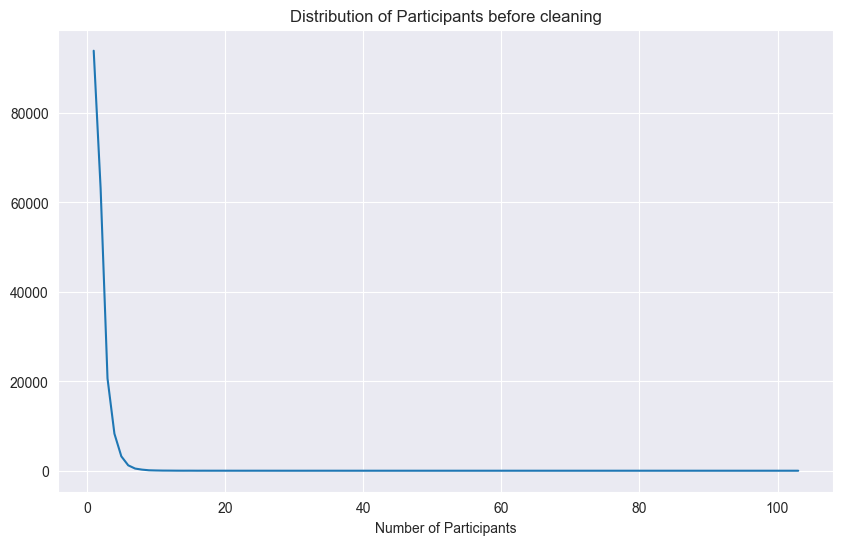

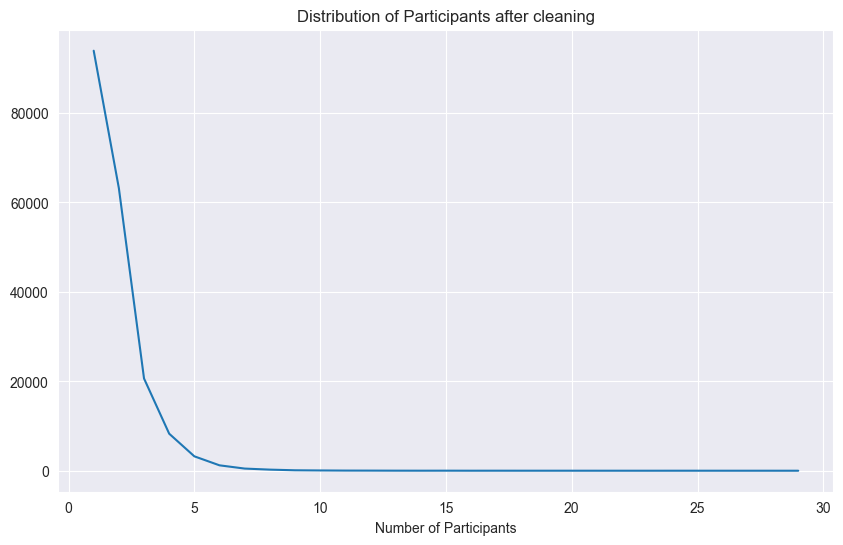

In [17]:
# distribution of n_participants
plt.figure(figsize=(10, 6))
plt.plot(incidents['n_participants'].value_counts().sort_index())
#sns.boxplot(x=incidents['n_participants'])
plt.title('Distribution of Participants before cleaning')
plt.xlabel('Number of Participants')
plt.show()
incidents = incidents[incidents['n_participants'] < 30]

plt.figure(figsize=(10, 6))
plt.plot(incidents['n_participants'].value_counts().sort_index())
#sns.boxplot(x=incidents['n_participants'])
plt.title('Distribution of Participants after cleaning')
plt.xlabel('Number of Participants')
plt.show()


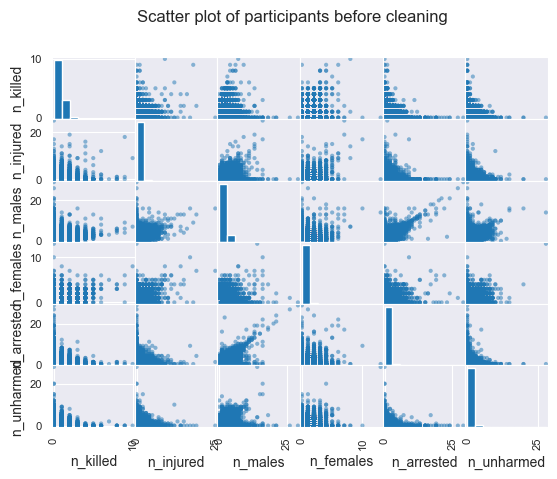

,date,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,min_age_participants,avg_age_participants,max_age_participants,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,year,month,day
count,191521,184142.000000,184142.000000,180865.000000,160512.000000,165896.000000,147012.000000,147016.000000,147012.000000,147013.000000,...,180041.000000,180041.000000,191521.000000,191521.000000,191521.0,191521.0,191521.000000,191521.000000,191521.000000,191521.00000
mean,2016-05-08 14:37:43.935547392,37.618101,-89.400993,7.948918,54.864160,20.289880,30.295146,28.343616,29.999742,31.795862,...,1.521670,0.214579,0.298563,0.546864,0.503903,0.451778,1.814610,2015.864375,6.377311,15.76376
min,2014-01-01 00:00:00,19.111400,-171.429000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,2014.000000,1.000000,1.00000
25%,2015-06-03 00:00:00,33.979900,-93.989500,2.000000,21.000000,8.000000,21.000000,20.000000,21.000000,22.000000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,2015.000000,3.000000,8.00000
50%,2016-06-26 00:00:00,38.637200,-86.609100,5.000000,46.000000,18.000000,27.000000,25.000000,27.000000,28.000000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.0,2.000000,2016.000000,6.000000,16.00000
75%,2017-05-08 00:00:00,41.478775,-80.061700,10.000000,83.000000,30.000000,37.000000,34.000000,36.000000,38.000000,...,2.000000,0.000000,1.000000,1.000000,1.0,1.0,2.000000,2017.000000,9.000000,23.00000
max,2018-03-31 00:00:00,71.336800,-67.271100,53.000000,901.000000,94.000000,101.000000,101.000000,101.000000,101.000000,...,29.000000,13.000000,10.000000,25.000000,29.0,28.0,29.000000,2018.000000,12.000000,31.00000
std,NaN,5.072610,14.297665,8.404449,42.500071,14.237509,13.332739,12.478563,12.441406,13.689487,...,0.969725,0.486528,0.537401,0.731360,0.84725,0.879881,1.127084,1.189905,3.486661,8.83396


In [18]:
# Select columns for scatter matrix
scatter_cols = ['n_killed', 'n_injured', 'n_males', 'n_females', 'n_arrested', 'n_unharmed']

pd.plotting.scatter_matrix(incidents[scatter_cols])
plt.suptitle('Scatter plot of participants before cleaning')
plt.show()
incidents.describe()


We can see that there are some outliers in the number of participants, especially killed and males one, so we remove them.

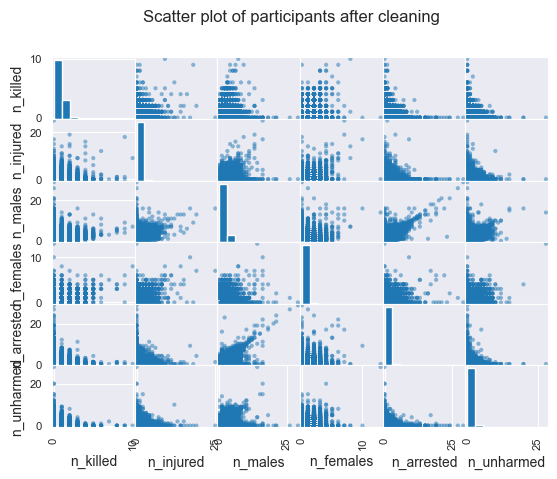

,date,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,min_age_participants,avg_age_participants,max_age_participants,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,year,month,day
count,191521,184142.000000,184142.000000,180865.000000,160512.000000,165896.000000,147012.000000,147016.000000,147012.000000,147013.000000,...,180041.000000,180041.000000,191521.000000,191521.000000,191521.0,191521.0,191521.000000,191521.000000,191521.000000,191521.00000
mean,2016-05-08 14:37:43.935547392,37.618101,-89.400993,7.948918,54.864160,20.289880,30.295146,28.343616,29.999742,31.795862,...,1.521670,0.214579,0.298563,0.546864,0.503903,0.451778,1.814610,2015.864375,6.377311,15.76376
min,2014-01-01 00:00:00,19.111400,-171.429000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,2014.000000,1.000000,1.00000
25%,2015-06-03 00:00:00,33.979900,-93.989500,2.000000,21.000000,8.000000,21.000000,20.000000,21.000000,22.000000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,2015.000000,3.000000,8.00000
50%,2016-06-26 00:00:00,38.637200,-86.609100,5.000000,46.000000,18.000000,27.000000,25.000000,27.000000,28.000000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.0,2.000000,2016.000000,6.000000,16.00000
75%,2017-05-08 00:00:00,41.478775,-80.061700,10.000000,83.000000,30.000000,37.000000,34.000000,36.000000,38.000000,...,2.000000,0.000000,1.000000,1.000000,1.0,1.0,2.000000,2017.000000,9.000000,23.00000
max,2018-03-31 00:00:00,71.336800,-67.271100,53.000000,901.000000,94.000000,101.000000,101.000000,101.000000,101.000000,...,29.000000,13.000000,10.000000,25.000000,29.0,28.0,29.000000,2018.000000,12.000000,31.00000
std,NaN,5.072610,14.297665,8.404449,42.500071,14.237509,13.332739,12.478563,12.441406,13.689487,...,0.969725,0.486528,0.537401,0.731360,0.84725,0.879881,1.127084,1.189905,3.486661,8.83396


In [19]:
# we remove the spotted outliers
incidents = incidents[incidents['n_killed'] < 25]

pd.plotting.scatter_matrix(incidents[scatter_cols])
plt.suptitle('Scatter plot of participants after cleaning')
plt.show()

incidents.describe()


# Gender distribution

Analyze the distribution of men and women participants.

In [20]:
# distribution of n_males and n_females




# Age distribution

Analyze the distribution of the age of the participants. Since there are many null values, we need to exclude them before plotting the distribution. To not lose the data, we create a copy of the dataframe, and then we drop the rows with null values on the age columns.

<class 'pandas.core.frame.DataFrame'>
Index: 191521 entries, 0 to 239676
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       191521 non-null  datetime64[ns]
 1   state                      191521 non-null  object        
 2   city_or_county             191521 non-null  object        
 3   address                    178073 non-null  object        
 4   latitude                   184142 non-null  float64       
 5   longitude                  184142 non-null  float64       
 6   congressional_district     180865 non-null  float64       
 7   state_house_district       160512 non-null  float64       
 8   state_senate_district      165896 non-null  float64       
 9   participant_age1           147012 non-null  float64       
 10  participant_age_group1     174405 non-null  object        
 11  participant_gender1        180041 non-null  object       

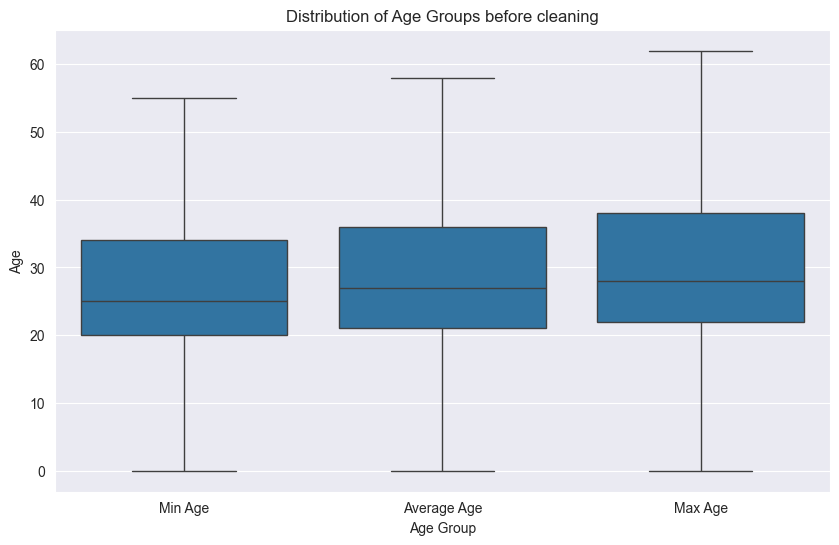

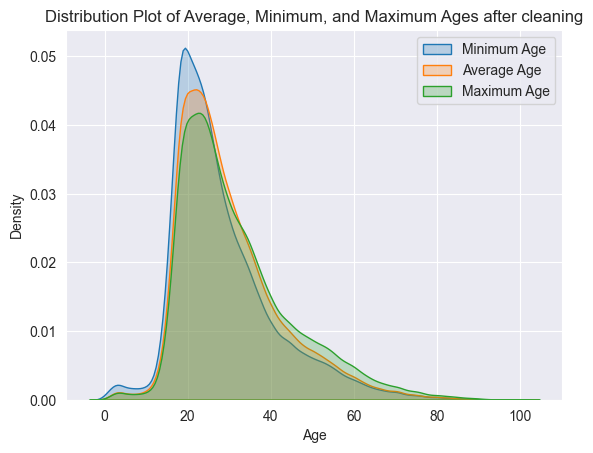

In [21]:
incidents.info()

copy_incidents = incidents.copy()

incidents = incidents.dropna(subset=age_columns)

dirty_data = incidents[['min_age_participants', 'avg_age_participants', 'max_age_participants']].melt()

plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=dirty_data, showfliers=False)
plt.title('Distribution of Age Groups before cleaning')
plt.xlabel('Age Group')
plt.ylabel('Age')
plt.xticks([0, 1, 2], ['Min Age', 'Average Age', 'Max Age'])  # Set x-axis labels
plt.show()

incidents = incidents[(incidents.avg_age_participants >= incidents.min_age_participants) &
                      (incidents.avg_age_participants <= incidents.max_age_participants)]

sns.kdeplot(incidents['min_age_participants'], fill=True, label='Minimum Age')
sns.kdeplot(incidents['avg_age_participants'], fill=True, label='Average Age')
sns.kdeplot(incidents['max_age_participants'], fill=True, label='Maximum Age')

plt.title('Distribution Plot of Average, Minimum, and Maximum Ages after cleaning')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()
incidents.describe()

# restore the original dataframe
incidents = copy_incidents

We do the same for the number of participants by groups

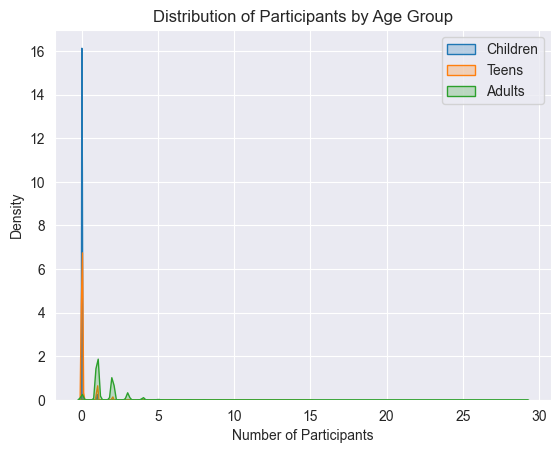

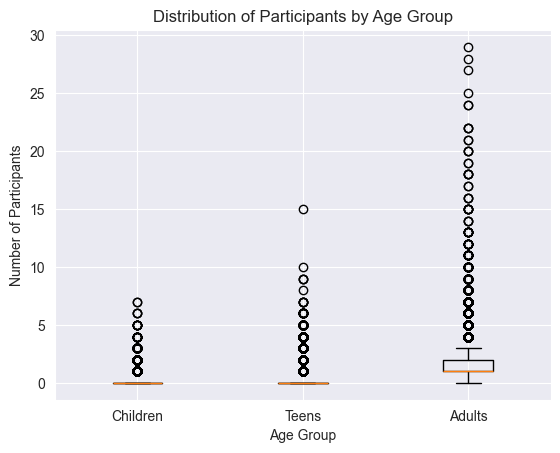

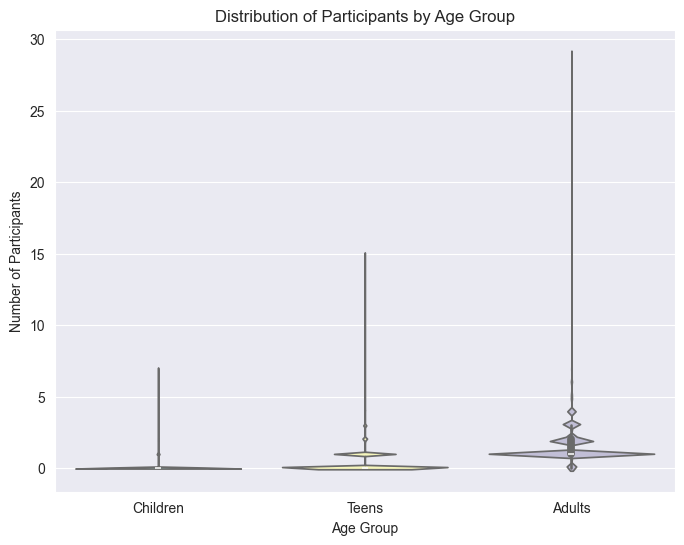

In [22]:
copy_incidents = incidents.copy()

sns.kdeplot(incidents['n_participants_child'], fill=True, label='Children')
sns.kdeplot(incidents['n_participants_teen'], fill=True, label='Teens')
sns.kdeplot(incidents['n_participants_adult'], fill=True, label='Adults')

plt.title('Distribution of Participants by Age Group')
plt.xlabel('Number of Participants')
plt.ylabel('Density')
plt.legend()
plt.show()

#use n_participants as ceiling for the sum of the three age groups
incidents = incidents[(
                                  incidents.n_participants_child + incidents.n_participants_teen + incidents.n_participants_adult) <= incidents.n_participants]

plt.boxplot([incidents['n_participants_child'], incidents['n_participants_teen'], incidents['n_participants_adult']],
            labels=['Children', 'Teens', 'Adults'])

plt.title('Distribution of Participants by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Participants')
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(
    data=[incidents['n_participants_child'], incidents['n_participants_teen'], incidents['n_participants_adult']],
    palette='Set3')

plt.title('Distribution of Participants by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Participants')
plt.xticks(ticks=[0, 1, 2], labels=['Children', 'Teens', 'Adults'])
plt.show()

incidents = copy_incidents

In [23]:
incidents.info()
incidents.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 191521 entries, 0 to 239676
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       191521 non-null  datetime64[ns]
 1   state                      191521 non-null  object        
 2   city_or_county             191521 non-null  object        
 3   address                    178073 non-null  object        
 4   latitude                   184142 non-null  float64       
 5   longitude                  184142 non-null  float64       
 6   congressional_district     180865 non-null  float64       
 7   state_house_district       160512 non-null  float64       
 8   state_senate_district      165896 non-null  float64       
 9   participant_age1           147012 non-null  float64       
 10  participant_age_group1     174405 non-null  object        
 11  participant_gender1        180041 non-null  object       

,date,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,min_age_participants,avg_age_participants,max_age_participants,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,year,month,day
count,191521,184142.000000,184142.000000,180865.000000,160512.000000,165896.000000,147012.000000,147016.000000,147012.000000,147013.000000,...,180041.000000,180041.000000,191521.000000,191521.000000,191521.0,191521.0,191521.000000,191521.000000,191521.000000,191521.00000
mean,2016-05-08 14:37:43.935547392,37.618101,-89.400993,7.948918,54.864160,20.289880,30.295146,28.343616,29.999742,31.795862,...,1.521670,0.214579,0.298563,0.546864,0.503903,0.451778,1.814610,2015.864375,6.377311,15.76376
min,2014-01-01 00:00:00,19.111400,-171.429000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,2014.000000,1.000000,1.00000
25%,2015-06-03 00:00:00,33.979900,-93.989500,2.000000,21.000000,8.000000,21.000000,20.000000,21.000000,22.000000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,2015.000000,3.000000,8.00000
50%,2016-06-26 00:00:00,38.637200,-86.609100,5.000000,46.000000,18.000000,27.000000,25.000000,27.000000,28.000000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.0,2.000000,2016.000000,6.000000,16.00000
75%,2017-05-08 00:00:00,41.478775,-80.061700,10.000000,83.000000,30.000000,37.000000,34.000000,36.000000,38.000000,...,2.000000,0.000000,1.000000,1.000000,1.0,1.0,2.000000,2017.000000,9.000000,23.00000
max,2018-03-31 00:00:00,71.336800,-67.271100,53.000000,901.000000,94.000000,101.000000,101.000000,101.000000,101.000000,...,29.000000,13.000000,10.000000,25.000000,29.0,28.0,29.000000,2018.000000,12.000000,31.00000
std,NaN,5.072610,14.297665,8.404449,42.500071,14.237509,13.332739,12.478563,12.441406,13.689487,...,0.969725,0.486528,0.537401,0.731360,0.84725,0.879881,1.127084,1.189905,3.486661,8.83396


# Poverty Data Exploration

As seen before, there are only null values in the poverty percentage column, so we can drop those and proceed with the analysis.


In [24]:
poverty.info()
poverty.describe()

poverty = poverty.dropna(subset=['povertyPercentage'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              884 non-null    object 
 1   year               884 non-null    int64  
 2   povertyPercentage  832 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.8+ KB


# Features information

"Type" indicates the wanted feature Datatype for conversion, most of the columns are defaulted to object type and need casting.

- **state**
    - **Type:** String
- **year**
    - **Type:** Int64
- **povertyPercentage**
    - **Type:** Float64
    - **Description:** poverty percentage for the corresponding state and year.


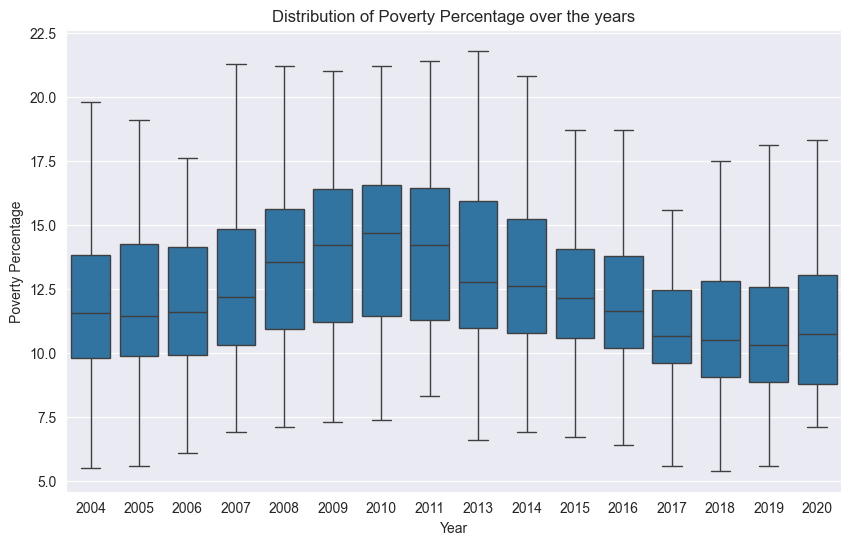

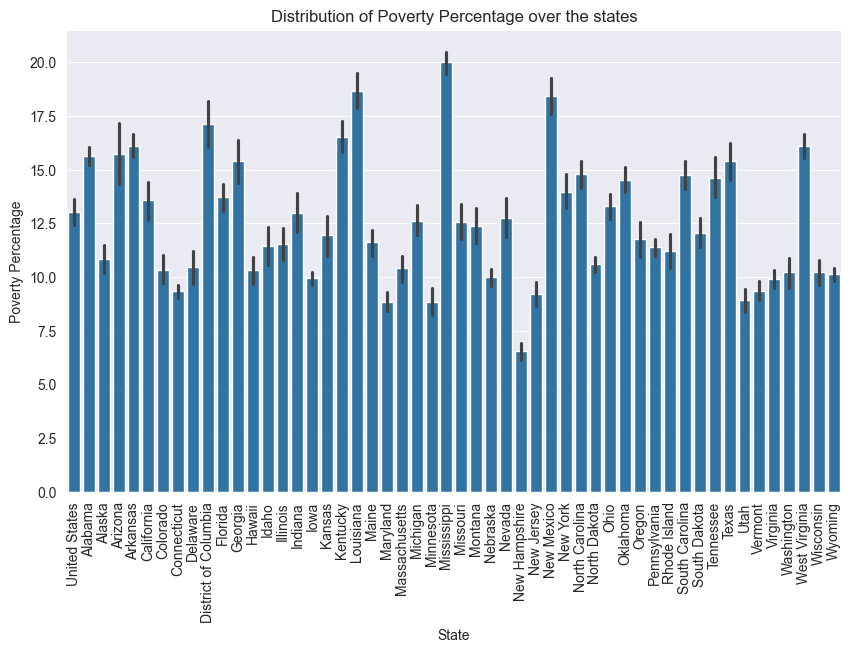

In [25]:
# Distribution over the years
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='povertyPercentage', data=poverty, showfliers=False)
plt.title('Distribution of Poverty Percentage over the years')
plt.xlabel('Year')
plt.ylabel('Poverty Percentage')
plt.show()

# Distribution over the states
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='povertyPercentage', data=poverty)
plt.title('Distribution of Poverty Percentage over the states')
plt.xlabel('State')
plt.ylabel('Poverty Percentage')
plt.xticks(rotation=90)
plt.show()


We can notice how data from 2012 is missing, and that states include a mean entry for the whole country (United States).
No outlier seems to be present in the data.

# Districts Data Exploration

As seen before, there are no null values in the dataset, nor duplicates, so we can proceed with the analysis.

In [26]:
districts.info()
districts.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    10441 non-null  int64 
 1   state                   10441 non-null  object
 2   congressional_district  10441 non-null  int64 
 3   party                   10441 non-null  object
 4   candidatevotes          10441 non-null  int64 
 5   totalvotes              10441 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 489.5+ KB


,year,congressional_district,candidatevotes,totalvotes
count,10441.000000,10441.000000,1.044100e+04,1.044100e+04
mean,1999.002011,9.873096,1.345276e+05,2.076422e+05
std,13.845898,10.017078,5.160721e+04,8.262643e+04
min,1976.000000,0.000000,-1.000000e+00,-1.000000e+00
25%,1988.000000,3.000000,1.004870e+05,1.554510e+05
50%,2000.000000,6.000000,1.290850e+05,2.004450e+05
75%,2012.000000,13.000000,1.653710e+05,2.555770e+05
max,2022.000000,53.000000,1.165136e+06,2.656104e+06


# Features information

"Type" indicates the wanted feature Datatype for conversion, most of the columns are defaulted to object type and need casting.

- **year**
    - **Type:** int64
    - **Description:** Year of the election.
- **state**
    - **Type:** string
    - **Description:** State where the data was collected.
- **congressional_district**
    - **Type:** int64
    - **Description:** Congressional district of the state where the data was collected.
- **party**
    - **Type:** string
    - **Description:** Party of the winning candidate of this election.
- **candidatevotes**
    - **Type:** int64
    - **Description:** Number of votes for the winning candidate from this district.
- **totalvotes**
    - **Type:** int64
    - **Description:** Total number of votes from this district.

We can notice that the name of the state is not consistent with the other datasets, so we need to fix it.
Moreover, we can notice that there are rows with negative values, so we need to remove them.

In [27]:
districts.head()

districts.state = districts.state.str.title()
districts.party = districts.party.str.title()
districts = districts[districts.candidatevotes >= 0 & (districts.candidatevotes <= districts.totalvotes)]

districts

,year,state,congressional_district,party,candidatevotes,totalvotes
0,1976,Alabama,1,Republican,98257,157170
1,1976,Alabama,2,Republican,90069,156362
2,1976,Alabama,3,Democrat,106935,108048
3,1976,Alabama,4,Democrat,141490,176022
4,1976,Alabama,5,Democrat,113553,113560
...,...,...,...,...,...,...
10436,2022,Wisconsin,5,Republican,243741,378523
10437,2022,Wisconsin,6,Republican,239231,251999
10438,2022,Wisconsin,7,Republican,209224,338268
10439,2022,Wisconsin,8,Republican,223981,310196


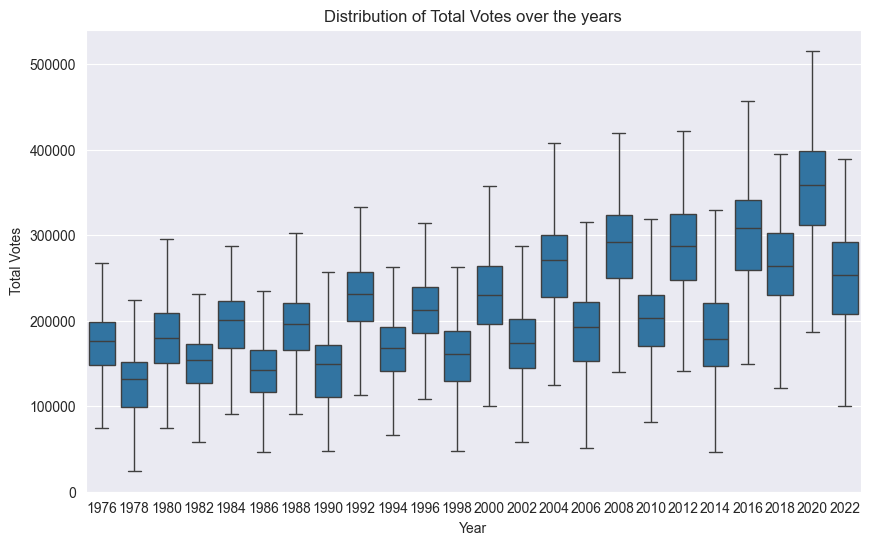

In [28]:
#Distribution of the total votes over the years

plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='totalvotes', data=districts, showfliers=False)
plt.title('Distribution of Total Votes over the years')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.show()

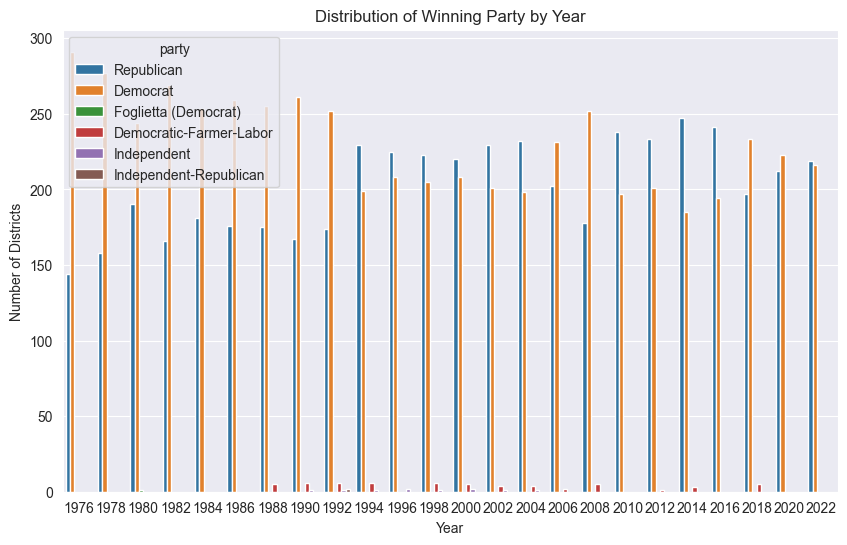

In [29]:
# Distribution of winning party by year

plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='party', data=districts)
plt.title('Distribution of Winning Party by Year')
plt.xlabel('Year')
plt.ylabel('Number of Districts')
plt.show()

We can restrict the dataset to the years 2014 and 2018, as they are the only ones present in the first dataset.
Since an election is held every two years, we can assume that the distribution of the winning party is the same for the years in between.
We also need to group the less important parties into a single one, to simplify the analysis.

C:\Users\Hp\AppData\Local\Temp\ipykernel_10748\471366125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  districts.party = districts.party.apply(m.group_parties)


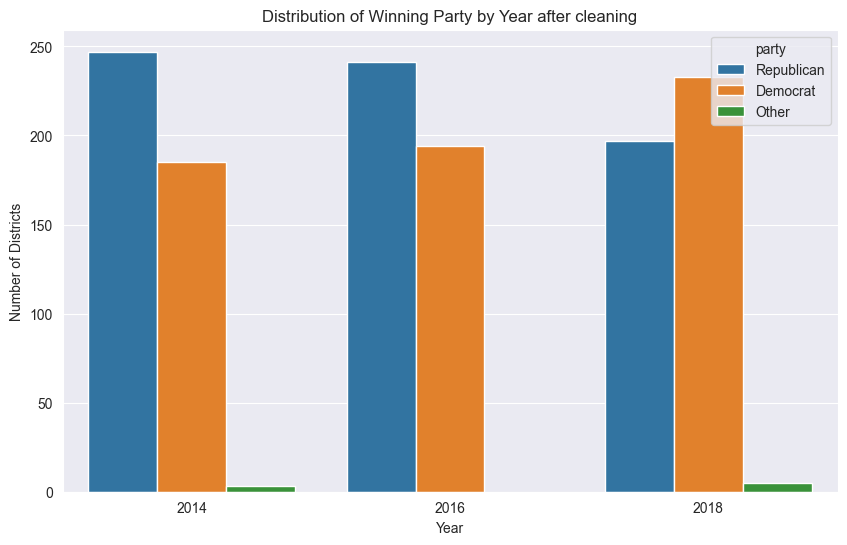

In [30]:
districts = districts[(districts.year >= 2014) & (districts.year <= 2018)]

districts.party = districts.party.apply(m.group_parties)

# Distribution of winning party by year

plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='party', data=districts)
plt.title('Distribution of Winning Party by Year after cleaning')
plt.xlabel('Year')
plt.ylabel('Number of Districts')
plt.show()

# Population Data Exploration
This is an external dataset taken from https://www.statsamerica.org/downloads/default.aspx
It holds the population of each state for each year, divided by age group.
We only select the population of the whole state, and we drop the columns that are not useful for our analysis.

In [31]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63882 entries, 0 to 63881
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IBRC_Geo_ID          63882 non-null  int64  
 1   Statefips            63882 non-null  int64  
 2   Countyfips           63882 non-null  int64  
 3   Description          63882 non-null  object 
 4   Year                 63882 non-null  int64  
 5   Total Population     63882 non-null  float64
 6   Population 0-4       63882 non-null  float64
 7   Population 5-17      63882 non-null  float64
 8   Population 18-24     63882 non-null  float64
 9   Population 25-44     63882 non-null  float64
 10  Population 45-64     63882 non-null  float64
 11  Population 65+       63882 non-null  float64
 12  Population Under 18  63882 non-null  float64
 13  Population 18-54     63882 non-null  float64
 14  Population 55+       63882 non-null  float64
 15  Male Population      63882 non-null 

In [32]:
population = population[(population['Countyfips'] == 0) & (population['Year'] < 2019) & (population['Year'] > 2013)]
population = population.drop(
    columns=['IBRC_Geo_ID', 'Statefips', 'Countyfips', 'Population 0-4', 'Population 5-17', 'Population 18-24',
             'Population 25-44', 'Population 45-64', 'Population 65+'])
population = population.rename(columns={'Description': 'state', 'Year': 'year'})

In [33]:
# save the cleaned data for the next phase
incidents.to_csv('../data/incidents_cleaned.csv', index=False)
poverty.to_csv('../data/poverty_cleaned.csv', index=False)
districts.to_csv('../data/districts_cleaned.csv', index=False)
population.to_csv('../data/population_cleaned.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 191521 entries, 0 to 239676
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       191521 non-null  datetime64[ns]
 1   state                      191521 non-null  object        
 2   city_or_county             191521 non-null  object        
 3   address                    178073 non-null  object        
 4   latitude                   184142 non-null  float64       
 5   longitude                  184142 non-null  float64       
 6   congressional_district     180865 non-null  float64       
 7   state_house_district       160512 non-null  float64       
 8   state_senate_district      165896 non-null  float64       
 9   participant_age1           147012 non-null  float64       
 10  participant_age_group1     174405 non-null  object        
 11  participant_gender1        180041 non-null  object       

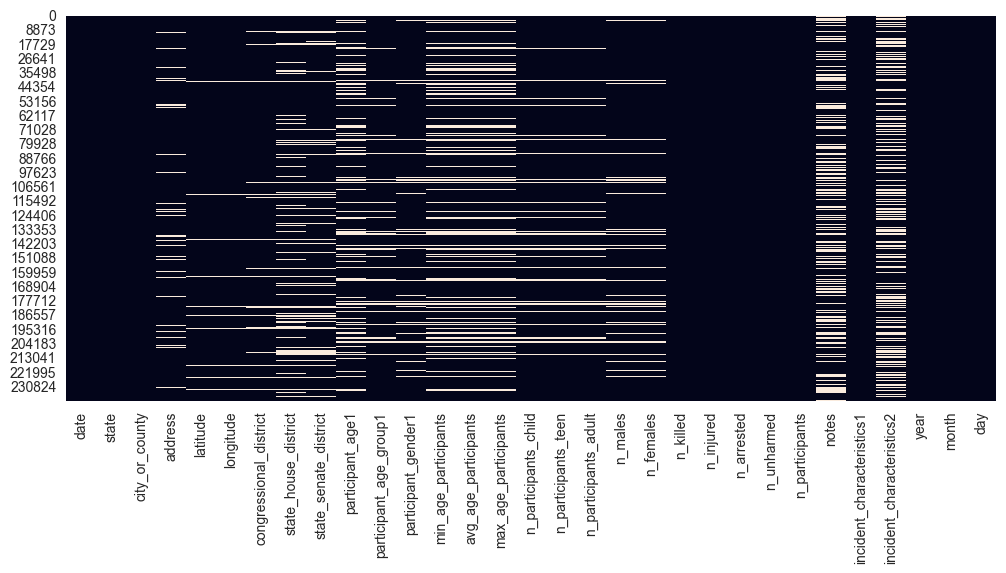

In [34]:
incidents.info()

fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(incidents.isnull(), cbar=False, xticklabels=True, ax=ax)
plt.show()

<Axes: >

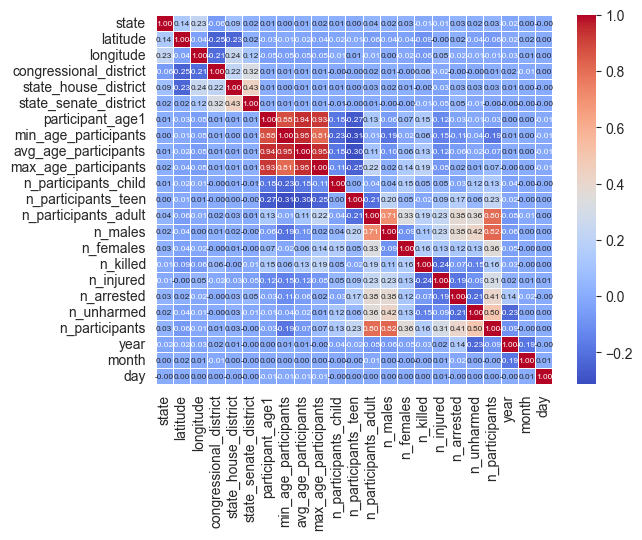

In [39]:
from sklearn.preprocessing import LabelEncoder

df = incidents.copy()
df['state'] = LabelEncoder().fit_transform(df['state'])

correlation_matrix = df.select_dtypes(include='number').corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, annot_kws={"size": 6})